In [3]:
import numpy as np
import matplotlib as plt
import seaborn as sb
import pandas as pd
import scipy.stats as st
import geopandas as geop


In [4]:
master = pd.read_csv('StormEvents_details_MASTER.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'StormEvents_details_MASTER.csv'

In [ ]:
master_cut = master[master['BEGIN_YEARMONTH'] < 202212]
master = 0 #don't need this massive thing anymore
master_cut_t1 = master_cut[master_cut['EVENT_TYPE'] == 'Tornado']
master_cut_t2 = master_cut[master_cut['EVENT_TYPE'] == 'TORNADOES']
master_cut = 0 #don't need this massive thing anymore
master_tornado = pd.concat([master_cut_t1, master_cut_t2])
master_cut_t1 = 0
master_cut_t2 = 0
master = 0
master_tornado = master_tornado.reset_index()

In [ ]:
#limit to the contigous US, https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States
#and https://geohack.toolforge.org for the decimal values
#Northern most Point of contigous US - Sumas, Washington 49°00′08.6″N 122°15′40″W 
#Southern most Point of contigous US - Western Dry Rocks, Florida Keys, Florida 24°26.8′N 81°55.6′W
#Eastern most point of mainland US - West Quoddy Head, Maine 44°48′55.4″N 66°56′59.2″W
#Western most point of mainland US - Cape Alava, Washington 48°9′51″N 124°43′59″W 
N_cut = (49.002389, -122.261111)
S_cut = (24.446667, -81.926667)
E_cut = (44.815389, -66.949778)
W_cut = (48.164167, -124.733056)

map_cut1 = master_tornado[master_tornado['BEGIN_LAT'] <= N_cut[0]]
map_cut2 = map_cut1[map_cut1['BEGIN_LAT'] >= S_cut[0]]
map_cut3 = map_cut2[map_cut2['BEGIN_LON'] >= W_cut[1]]
usa = map_cut3[map_cut3['BEGIN_LON'] <= E_cut[1]]

map_cut1 = 0
map_cut2 = 0
map_cut3 = 0

print(master_tornado['BEGIN_LAT'].count())
print(usa['BEGIN_LAT'].count())

73774
73700


In [ ]:
data_base = dbf.Dbf5('canadian_data/NationalTornadoTracks_1980-2009.dbf')
data_base.to_csv('canadian_tornado.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 7: invalid start byte

In [ ]:
canada = pd.read_csv('canadian_tornado.csv')

In [5]:
usa_map_data = geop.read_file('../assets/cb_2018_us_state_5m.shx')
canada_map_data = geop.read_file('../assets/lpr_000b21a_e.shx')
usa_canada_map_data = geop.read_file('../assets/combined-us-canada-with-states-provinces_793.geojson')

DriverError: Unable to open ../assets/cb_2018_us_state_5m.shp or ../assets/cb_2018_us_state_5m.SHP.

In [ ]:
#fig, ax = plt.pyplot.subplots()
def plot_map(yr):
    usa_canada_map = usa_canada_map_data.plot(color='white', edgecolor='black')
    usa_canada_map.set_ylim(24, 50)
    usa_canada_map.set_xlim(-125, -65)
    usa_canada_map.set_title(yr)
    usa_canada_map.scatter(usa[usa['YEAR'] == yr]['BEGIN_LON'].values, usa[usa['YEAR'] == yr]['BEGIN_LAT'].values, marker = 'o', s = 1)
#usa_canada_map.scatter(canada[canada['YYYY_LOCAL'] == 2000.0]['START_LON'].values, canada[canada['YYYY_LOCAL'] == 2000.0]['START_LAT'].values, marker = 'o', s = 1)


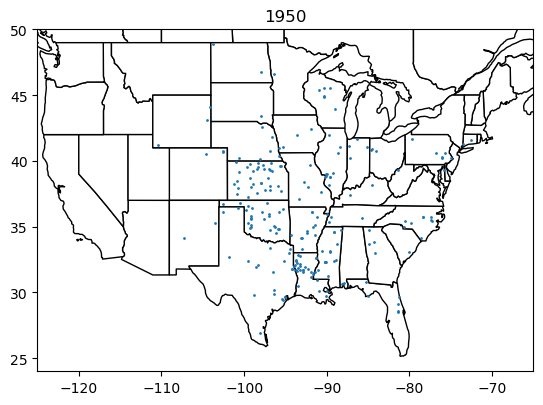

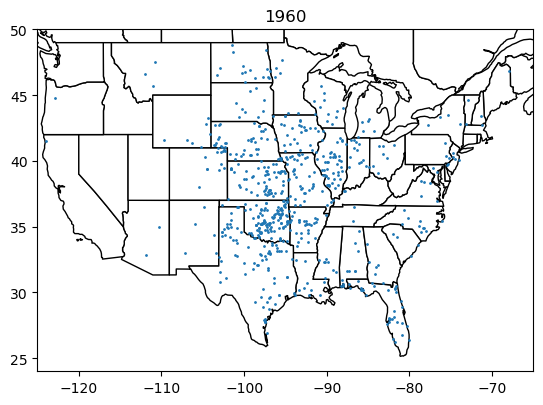

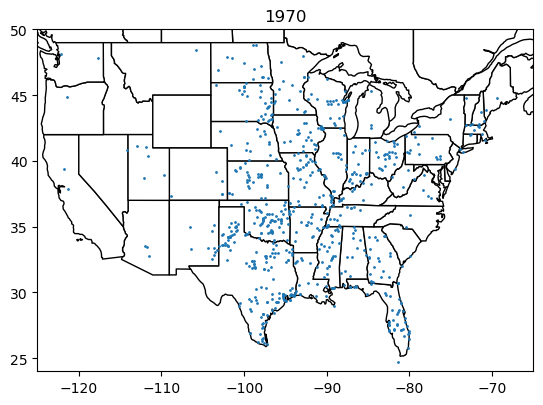

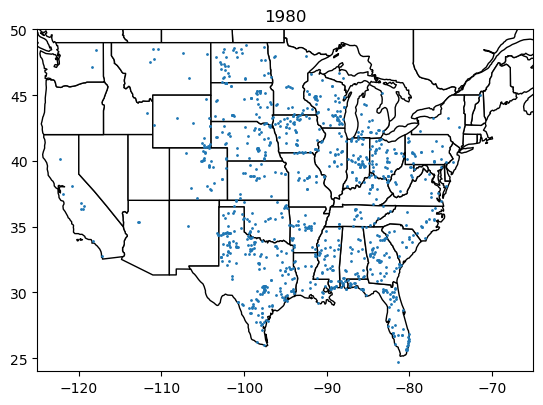

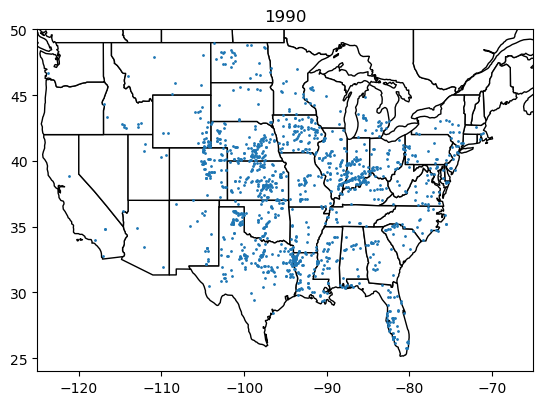

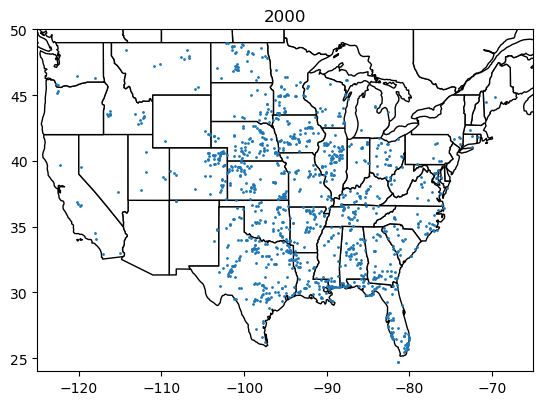

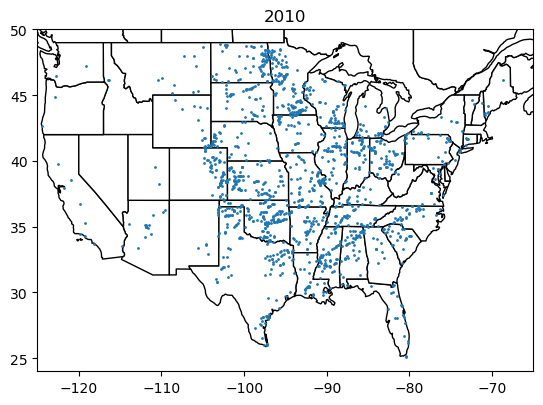

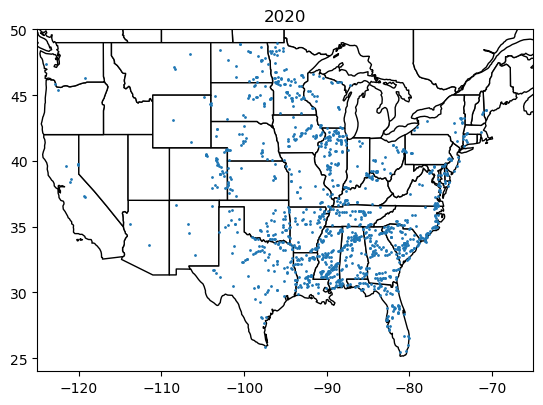

In [ ]:
for y in np.arange(1950, 2023, 10):
    plot_map(y)